### Twitter sentiment analysis
### Author: Abhishek Dubey
### Linkedin: https://www.linkedin.com/in/abhishek-dubey96/

### Text is everywhere in the form of opinions, complaints, news and information; each of us are contributing in general to put text throughout the internet. The large amount of text which is present in the unstructured format can be used for welfare of the society and businesses by analysing the sentiments and trends. A part of NLP deals with Text processing and analysis. Commonly available text can not be directly used for analysis, it needs to pre-processed first, and that is where NLTK, the most popular library for text processing in Python, comes into the picture.

### In this project I have performed **sentiment analysis** on **twitter tweets** on e-commerce company i.e. amazon. 



### **Following are the steps taken:**
#### 1. Imported neccessary libraries.
#### 2. Extracted tweets using tweepy.
#### 3. Found out sentiments using Textblob library.
#### 4. Plotted graphs on positive and negative sentiments.
#### 5. Plotted graphs on word count/ most common words.
#### 6. Plotted graph on hastags used.
#### 7. Cleaned text by removing username, http/https.
#### 8. Removed duplicates, whitespaces.
#### 9. Removed stopwords, tokenisation, lemmatization and joining the words.
#### 10. Made separate columns for key words and key phrase evaluation.
#### 11. Made a word cloud.
#### 12. Bag-of-words evaluation.
#### 13. TF-IDF evaluation.
#### 14. Gaussian model.
#### 15. Random forest model.

## Importing necessary libraries

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import csv
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import string 
punctuation = string.punctuation 

# To consume Twitter's API
import tweepy
from tweepy import OAuthHandler 
import csv

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

### Twitter web scraping

### Twitter Credentials

In [63]:
consumer_key = ''
consumer_secret = ''
access_key = ''
access_secret = ''

### Function to scrap tweets from twitter

In [64]:
def get_all_tweets(screen_name):
  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_key, access_secret)
  api = tweepy.API(auth)
  alltweets = [] 
  new_tweets = api.user_timeline(screen_name = screen_name,count=200)
  alltweets.extend(new_tweets)
  oldest = alltweets[-1].id - 1
  while len(new_tweets) > 0:
    print(f"getting tweets before {oldest}")
    new_tweets = api.user_timeline(screen_name = screen_name,count=3000,max_id=oldest)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    print(f"...{len(alltweets)} tweets downloaded so far")
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]

  with open(f'new_{screen_name}_tweets.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["id","created_at","text"])
    writer.writerows(outtweets)
    pass


### Tweets extraction

In [65]:
if __name__ == '__main__':
	#pass in the username of the account you want to download
	get_all_tweets("amazonIN") 

getting tweets before 1363660478149459968
...400 tweets downloaded so far
getting tweets before 1348087931437789184
...600 tweets downloaded so far
getting tweets before 1324728308378918917
...800 tweets downloaded so far
getting tweets before 1324665809646616577
...1000 tweets downloaded so far
getting tweets before 1322054019502673919
...1200 tweets downloaded so far
getting tweets before 1316704253277163521
...1400 tweets downloaded so far
getting tweets before 1295232312209100799
...1600 tweets downloaded so far
getting tweets before 1235566334492028929
...1800 tweets downloaded so far
getting tweets before 1194919918937886719
...2000 tweets downloaded so far
getting tweets before 1178621646271156223
...2200 tweets downloaded so far
getting tweets before 1158577069845966847
...2400 tweets downloaded so far
getting tweets before 1128185765865721857
...2600 tweets downloaded so far
getting tweets before 1111642054604587008
...2800 tweets downloaded so far
getting tweets before 106378

### Loading dataset of amazon which has been extracted from twitter

In [66]:
amazon_df = pd.read_csv("/content/new_amazonIN_tweets.csv")

In [67]:
amazon_df

,id,created_at,text
0,1382211373996724224,2021-04-14 05:57:26,The voices you know and love all in one place!...
1,1382178422772928512,2021-04-14 03:46:30,@ashishmohta Please be informed that post retu...
2,1382059031691464705,2021-04-13 19:52:05,"@PNidhey As informed earlier, due to unforesee..."
3,1382057704588464137,2021-04-13 19:46:48,"@PNidhey Hence, we request you to place a new ..."
4,1382057665027801089,2021-04-13 19:46:39,@PNidhey Apologies for the unpleasant experien...
...,...,...,...
3245,1049686134559830016,2018-10-09 15:40:51,@jaganmo32271892 Retweet now for The Great Ind...
3246,1049686134392049664,2018-10-09 15:40:51,@Subhadi84891644 Retweet now for The Great Ind...
3247,1049686134035501056,2018-10-09 15:40:51,@vikramk11068328 Retweet now for The Great Ind...
3248,1049686133809041409,2018-10-09 15:40:51,@Vamsi78944118 Retweet now for The Great India...


In [68]:
amazon_df.tail()

,id,created_at,text
3245,1049686134559830016,2018-10-09 15:40:51,@jaganmo32271892 Retweet now for The Great Ind...
3246,1049686134392049664,2018-10-09 15:40:51,@Subhadi84891644 Retweet now for The Great Ind...
3247,1049686134035501056,2018-10-09 15:40:51,@vikramk11068328 Retweet now for The Great Ind...
3248,1049686133809041409,2018-10-09 15:40:51,@Vamsi78944118 Retweet now for The Great India...
3249,1049686132991111169,2018-10-09 15:40:50,@Jobin93003785 Retweet now for The Great India...


### Removing unnecessary columns: **id** and **created_at**

In [69]:
amazon_df.drop(columns=['id','created_at'],axis=1,inplace=True)

In [70]:
amazon_df

,text
0,The voices you know and love all in one place!...
1,@ashishmohta Please be informed that post retu...
2,"@PNidhey As informed earlier, due to unforesee..."
3,"@PNidhey Hence, we request you to place a new ..."
4,@PNidhey Apologies for the unpleasant experien...
...,...
3245,@jaganmo32271892 Retweet now for The Great Ind...
3246,@Subhadi84891644 Retweet now for The Great Ind...
3247,@vikramk11068328 Retweet now for The Great Ind...
3248,@Vamsi78944118 Retweet now for The Great India...


### Function defining to check the sentiment of the dataset using **Textblob sentiment polarity**.

In [71]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [72]:
sentiments_using_textblob = amazon_df.text.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,text
pos,2896
neg,354


In [73]:
amazon_df['sentiment'] = sentiments_using_textblob
amazon_df.head()

,text,sentiment
0,The voices you know and love all in one place!...,pos
1,@ashishmohta Please be informed that post retu...,pos
2,"@PNidhey As informed earlier, due to unforesee...",neg
3,"@PNidhey Hence, we request you to place a new ...",pos
4,@PNidhey Apologies for the unpleasant experien...,neg


In [74]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3250 non-null   object
 1   sentiment  3250 non-null   object
dtypes: object(2)
memory usage: 50.9+ KB


### Calculating number of postive and negative sentiments

In [75]:
#amazon
positives_a = amazon_df['sentiment'][amazon_df.sentiment == 'pos']
negatives_a = amazon_df['sentiment'][amazon_df.sentiment == 'neg']

In [76]:
print('number of positve tagged sentences in amazon dataset is:  {}'.format(len(positives_a)))
print('number of negative tagged sentences in amazon dataset is: {}'.format(len(negatives_a)))
print('total length of the data in amazon dataset is:            {}'.format(amazon_df.shape[0]))

number of positve tagged sentences in amazon dataset is:  2896
number of negative tagged sentences in amazon dataset is: 354
total length of the data in amazon dataset is:            3250


### Get a word count per sentence column

In [77]:
def word_count(sentence):
    return len(sentence.split())
    
amazon_df['word count'] = amazon_df['text'].apply(word_count)

amazon_df.head(3)

,text,sentiment,word count
0,The voices you know and love all in one place!...,pos,19
1,@ashishmohta Please be informed that post retu...,pos,20
2,"@PNidhey As informed earlier, due to unforesee...",neg,20


### Plot word count distribution for both positive and negative sentiments.

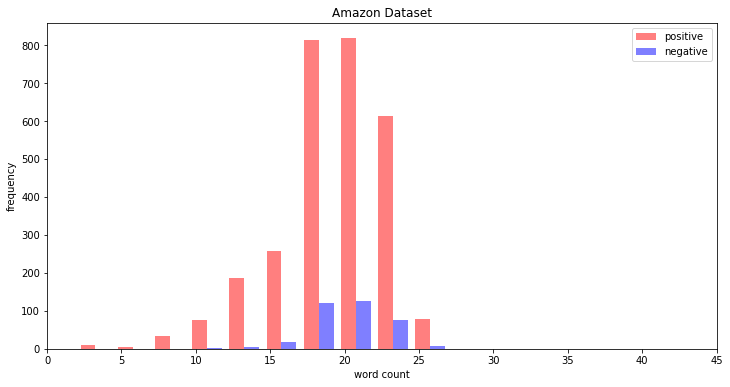

In [78]:
x = amazon_df['word count'][amazon_df.sentiment == 'pos']
y = amazon_df['word count'][amazon_df.sentiment == 'neg']
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
plt.title("Amazon Dataset")
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

#### From the graph above, most sentences fall between 15–25 words but it’s fair to say that majority of text on twitter falls between **1 and 25 words**. This is no wonder considering that **twitter has a limit of 25 characters** of one can use in a message. 

#### In all, it looks like 15–20 words covers more than 80% of all sentences which makes this dataset set a good training candidate.

#### There are **more positive sentences** with 15 words or more than there **are negative ones** which does not seem like a big enough difference to cause any concern at the moment. Also it can indicate that there is more of a positive sentiment than negative for amazon india.

### Get most common words in training dataset

In [79]:
amazon_all_words = []
for line in list(amazon_df['text']):
    words = line.split()
    for word in words:
        amazon_all_words.append(word.lower())
    
    
Counter(amazon_all_words).most_common(10)

[('the', 3043),
 ('to', 1954),
 ('your', 1351),
 ('and', 1232),
 ('for', 1149),
 ('on', 1073),
 ('you', 1038),
 ('with', 788),
 ('get', 771),
 ('a', 692)]

### Plotting word frequency distribution of first few words

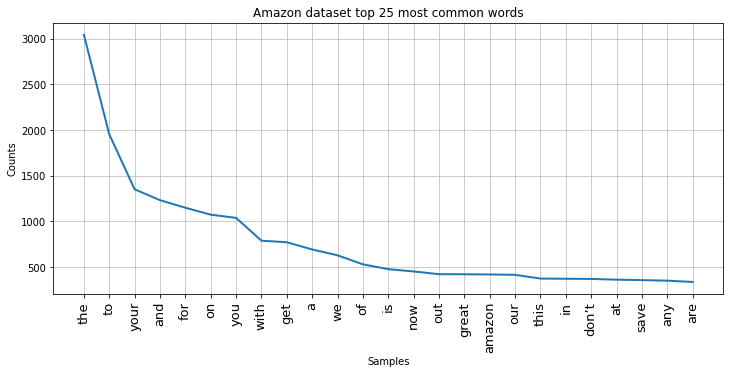

Text(0.5, 1.0, 'log-log plot of words frequency')

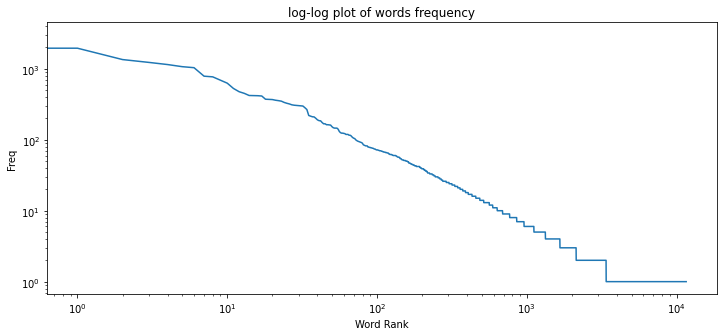

In [80]:
plt.figure(figsize=(12,5))
plt.title('Amazon dataset top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(amazon_all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(amazon_all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

## Function to plot hashtags

In [81]:
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [82]:
hashtags = hashtag_extract(amazon_df['text'])
hashtags = sum(hashtags, [])

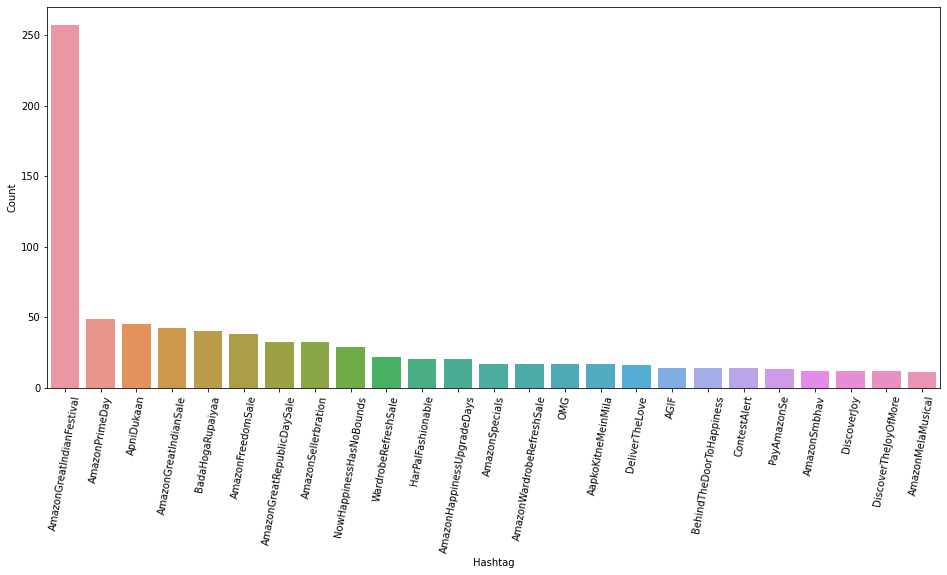

In [83]:
generate_hashtag_freqdist(hashtags)

### Amazon great indian festival is the highest number of hashtag that has been used.

### From here I would be doing analysis on **key words** and **key phrases**. So steps of text processing would be different for both the use cases.

### Helper function to remove **html,usernames, hyperlinks, hastags,whitespaces, punctuation** to get key words.

In [84]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    
    return tweet

### cleaned2 is the column that contains contain clean key words.

In [85]:
amazon_df['cleaned2'] = amazon_df['text'].apply(processTweet)


### Helper function to remove html,usernames, hyperlinks, hastags,whitespaces to get key phrases. Here I would not treat the punctuation as it may change the semantic meaning of the text.

In [86]:
def processTweet1(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove retweet
    tweet = re.sub('@[\w]*: | *RT*','',tweet)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    
    return tweet

### **tidy_tweets** contain words for key phrases.

In [87]:
amazon_df['tidy_tweets'] = amazon_df['text'].apply(processTweet1)

### Preview some cleaned tweets

In [88]:
amazon_df.head(100)

,text,sentiment,word count,cleaned2,tidy_tweets
0,The voices you know and love all in one place!...,pos,19,The voices you know and love all one place Dis...,The voices you know and love all in one place!...
1,@ashishmohta Please be informed that post retu...,pos,20,Please informed that post return window reques...,Please be informed that post return window we ...
2,"@PNidhey As informed earlier, due to unforesee...",neg,20,informed earlier due unforeseen reasons someti...,"As informed earlier, due to unforeseen reasons..."
3,"@PNidhey Hence, we request you to place a new ...",pos,21,Hence request you place new order required How...,"Hence, we request you to place a new order if ..."
4,@PNidhey Apologies for the unpleasant experien...,neg,19,Apologies for the unpleasant experience you’ h...,Apologies for the unpleasant experience you’ve...
...,...,...,...,...,...
95,Amazon Smbhav Entrepreneurship Challenge aims ...,pos,16,Amazon Smbhav Entrepreneurship Challenge aims ...,Amazon Smbhav Entrepreneurship Challenge aims ...
96,RT @RedmiIndia: Welcome to the launch of #Redm...,pos,27,Welcome the launch 1st ever Smart Gear hop the...,Welcome to the launch of 's 1st ever Smart TV...
97,Here are the terms and conditions. https://t.c...,pos,7,Here are the terms and conditions,Here are the terms and conditions.
98,This is our entry. Now it's your turn to get c...,pos,12,This our entry Now your turn get creative,This is our entry. Now it's your turn to get c...


### From here **text processing** for **key words** begins.

### Extra white space removal.

In [89]:
amazon_df = amazon_df[amazon_df['cleaned2']!='']

amazon_df.head()

,text,sentiment,word count,cleaned2,tidy_tweets
0,The voices you know and love all in one place!...,pos,19,The voices you know and love all one place Dis...,The voices you know and love all in one place!...
1,@ashishmohta Please be informed that post retu...,pos,20,Please informed that post return window reques...,Please be informed that post return window we ...
2,"@PNidhey As informed earlier, due to unforesee...",neg,20,informed earlier due unforeseen reasons someti...,"As informed earlier, due to unforeseen reasons..."
3,"@PNidhey Hence, we request you to place a new ...",pos,21,Hence request you place new order required How...,"Hence, we request you to place a new order if ..."
4,@PNidhey Apologies for the unpleasant experien...,neg,19,Apologies for the unpleasant experience you’ h...,Apologies for the unpleasant experience you’ve...


In [90]:
amazon_df.shape

(3245, 5)

### Removing duplicates

In [91]:
amazon_df.drop_duplicates(subset=['cleaned2'], keep=False)

amazon_df.head()

,text,sentiment,word count,cleaned2,tidy_tweets
0,The voices you know and love all in one place!...,pos,19,The voices you know and love all one place Dis...,The voices you know and love all in one place!...
1,@ashishmohta Please be informed that post retu...,pos,20,Please informed that post return window reques...,Please be informed that post return window we ...
2,"@PNidhey As informed earlier, due to unforesee...",neg,20,informed earlier due unforeseen reasons someti...,"As informed earlier, due to unforeseen reasons..."
3,"@PNidhey Hence, we request you to place a new ...",pos,21,Hence request you place new order required How...,"Hence, we request you to place a new order if ..."
4,@PNidhey Apologies for the unpleasant experien...,neg,19,Apologies for the unpleasant experience you’ h...,Apologies for the unpleasant experience you’ve...


In [92]:
amazon_df.shape

(3245, 5)

### Resetting index

In [93]:
amazon_df = amazon_df.reset_index(drop=True)

amazon_df.head()

,text,sentiment,word count,cleaned2,tidy_tweets
0,The voices you know and love all in one place!...,pos,19,The voices you know and love all one place Dis...,The voices you know and love all in one place!...
1,@ashishmohta Please be informed that post retu...,pos,20,Please informed that post return window reques...,Please be informed that post return window we ...
2,"@PNidhey As informed earlier, due to unforesee...",neg,20,informed earlier due unforeseen reasons someti...,"As informed earlier, due to unforeseen reasons..."
3,"@PNidhey Hence, we request you to place a new ...",pos,21,Hence request you place new order required How...,"Hence, we request you to place a new order if ..."
4,@PNidhey Apologies for the unpleasant experien...,neg,19,Apologies for the unpleasant experience you’ h...,Apologies for the unpleasant experience you’ve...


In [94]:
# amazon
amazon_df['cleaned2'] = amazon_df['cleaned2'].str.replace("[^a-zA-Z# ]", "")
amazon_df['cleaned2'] = amazon_df['cleaned2'].str.lower()


### Removing stopwords.

In [95]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in amazon_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.cleaned2.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
amazon_df['cleaned2'] = cleaned_tweets
amazon_df.head(10)

,text,sentiment,word count,cleaned2,tidy_tweets
0,The voices you know and love all in one place!...,pos,19,voices know love one place discover podcasts a...,The voices you know and love all in one place!...
1,@ashishmohta Please be informed that post retu...,pos,20,please informed post return window request rea...,Please be informed that post return window we ...
2,"@PNidhey As informed earlier, due to unforesee...",neg,20,informed earlier due unforeseen reasons someti...,"As informed earlier, due to unforeseen reasons..."
3,"@PNidhey Hence, we request you to place a new ...",pos,21,hence request place new order required however...,"Hence, we request you to place a new order if ..."
4,@PNidhey Apologies for the unpleasant experien...,neg,19,apologies unpleasant experience recent order p...,Apologies for the unpleasant experience you’ve...
5,Join us on the 17th at Amazon Smbhav Summit to...,pos,22,join th amazon smbhav summit hear nandan nilek...,Join us on the 17th at Amazon Smbhav Summit to...
6,@holybeed We understand that you've had an unp...,neg,20,understand unpleasant experience delivery orde...,We understand that you've had an unpleasant ex...
7,Get grooving as the @sony_india Audio Days are...,pos,21,get grooving audio days live amazon india pick...,Get grooving as the Audio Days are now live on...
8,RT @AmazonFashionIn: Every ride has its own lo...,pos,22,every ride look latest styles choose top brand...,Every ride has its own look! Be with 9L+ Late...
9,Join us on 16th at #AmazonSmbhav to hear Mr. P...,pos,19,join th hear piyush pandey chief creative offi...,"Join us on 16th at to hear Mr. Piyush Pandey, ..."


### Tokenization

In [96]:
tokenized_tweet_a = amazon_df['cleaned2'].apply(lambda x: x.split())

tokenized_tweet_a.head()

0    [voices, know, love, one, place, discover, pod...
1    [please, informed, post, return, window, reque...
2    [informed, earlier, due, unforeseen, reasons, ...
3    [hence, request, place, new, order, required, ...
4    [apologies, unpleasant, experience, recent, or...
Name: cleaned2, dtype: object

### Lemmatization

In [97]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet_a = tokenized_tweet_a.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

tokenized_tweet_a.head()

0    [voice, know, love, one, place, discover, podc...
1    [please, informed, post, return, window, reque...
2    [informed, earlier, due, unforeseen, reason, s...
3    [hence, request, place, new, order, required, ...
4    [apology, unpleasant, experience, recent, orde...
Name: cleaned2, dtype: object

### joining into a single sentence

In [98]:
#Amazon
for i, tokens in enumerate(tokenized_tweet_a):
    tokenized_tweet_a[i] = ' '.join(tokens)

amazon_df['cleaned2'] = tokenized_tweet_a

amazon_df.head(10)

,text,sentiment,word count,cleaned2,tidy_tweets
0,The voices you know and love all in one place!...,pos,19,voice know love one place discover podcasts am...,The voices you know and love all in one place!...
1,@ashishmohta Please be informed that post retu...,pos,20,please informed post return window request rea...,Please be informed that post return window we ...
2,"@PNidhey As informed earlier, due to unforesee...",neg,20,informed earlier due unforeseen reason sometim...,"As informed earlier, due to unforeseen reasons..."
3,"@PNidhey Hence, we request you to place a new ...",pos,21,hence request place new order required however...,"Hence, we request you to place a new order if ..."
4,@PNidhey Apologies for the unpleasant experien...,neg,19,apology unpleasant experience recent order ple...,Apologies for the unpleasant experience you’ve...
5,Join us on the 17th at Amazon Smbhav Summit to...,pos,22,join th amazon smbhav summit hear nandan nilek...,Join us on the 17th at Amazon Smbhav Summit to...
6,@holybeed We understand that you've had an unp...,neg,20,understand unpleasant experience delivery orde...,We understand that you've had an unpleasant ex...
7,Get grooving as the @sony_india Audio Days are...,pos,21,get grooving audio day live amazon india pick ...,Get grooving as the Audio Days are now live on...
8,RT @AmazonFashionIn: Every ride has its own lo...,pos,22,every ride look latest style choose top brand ...,Every ride has its own look! Be with 9L+ Late...
9,Join us on 16th at #AmazonSmbhav to hear Mr. P...,pos,19,join th hear piyush pandey chief creative offi...,"Join us on 16th at to hear Mr. Piyush Pandey, ..."


### Text processing for **key phrases**.

### Function to **lemmatize/stem**, **normalise** key phrases.

In [99]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

### Function to treat grammmatical mistakes.

In [100]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

### Extracting key phrases using above functions.

In [101]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in amazon_df.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['voice', 'place discover', 'amazon prime music', 'learn'],
 ['please', 'post return window', 'manufacturer'],
 ['unforeseen reason', 'order', " we'"],
 ['new order', " we'", 'instance', 'appro'],
 ['apology', 'unpleasant experience', 'recent order', 'unfores'],
 ['join',
  'amazon smbhav summit',
  ' mr. nandan nilekani',
  'co-founder',
  'chairman',
  'infosys'],
 ['unpleasant experience', 'delivery', 'order'],
 ['grooving', 'audio day', 'amazon india', 'favourite sony audio product'],
 ['ride', 'look', 'latest style', 'top brand'],
 ['join',
  ' mr. piyush pandey',
  'chief creative officer worldwide',
  'executive chairman']]

### Extracting **key phrases** using **textblob**.

In [102]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in amazon_df.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['discover podcasts', 'amazon prime music'],
 ['post return window'],
 [],
 ['place new order'],
 ['unpleasant experience', '’ ve', 'recent order'],
 ['amazon smbhav summit',
  'mr. nandan nilekani',
  'co-founder',
  'chairman',
  'infosys'],
 ['unpleasant experience', 'sure to…'],
 ['audio days', 'amazon india', 'favourite sony audio products at…'],
 ['9l', 'top brands'],
 ['mr. piyush pandey',
  'chief creative officer worldwide',
  'executive chairman…']]

### **Textblob** extracted **better key words** than self made functions so would proceed towards using these **key phrases** only.

In [103]:
amazon_df['key_phrases'] = textblob_key_phrases
amazon_df.head(10)

,text,sentiment,word count,cleaned2,tidy_tweets,key_phrases
0,The voices you know and love all in one place!...,pos,19,voice know love one place discover podcasts am...,The voices you know and love all in one place!...,"[discover podcasts, amazon prime music]"
1,@ashishmohta Please be informed that post retu...,pos,20,please informed post return window request rea...,Please be informed that post return window we ...,[post return window]
2,"@PNidhey As informed earlier, due to unforesee...",neg,20,informed earlier due unforeseen reason sometim...,"As informed earlier, due to unforeseen reasons...",[]
3,"@PNidhey Hence, we request you to place a new ...",pos,21,hence request place new order required however...,"Hence, we request you to place a new order if ...",[place new order]
4,@PNidhey Apologies for the unpleasant experien...,neg,19,apology unpleasant experience recent order ple...,Apologies for the unpleasant experience you’ve...,"[unpleasant experience, ’ ve, recent order]"
5,Join us on the 17th at Amazon Smbhav Summit to...,pos,22,join th amazon smbhav summit hear nandan nilek...,Join us on the 17th at Amazon Smbhav Summit to...,"[amazon smbhav summit, mr. nandan nilekani, co..."
6,@holybeed We understand that you've had an unp...,neg,20,understand unpleasant experience delivery orde...,We understand that you've had an unpleasant ex...,"[unpleasant experience, sure to…]"
7,Get grooving as the @sony_india Audio Days are...,pos,21,get grooving audio day live amazon india pick ...,Get grooving as the Audio Days are now live on...,"[audio days, amazon india, favourite sony audi..."
8,RT @AmazonFashionIn: Every ride has its own lo...,pos,22,every ride look latest style choose top brand ...,Every ride has its own look! Be with 9L+ Late...,"[9l, top brands]"
9,Join us on 16th at #AmazonSmbhav to hear Mr. P...,pos,19,join th hear piyush pandey chief creative offi...,"Join us on 16th at to hear Mr. Piyush Pandey, ...","[mr. piyush pandey, chief creative officer wor..."


### Generating wordcloud

In [104]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Blues_r').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

### Amazon Wordcloud

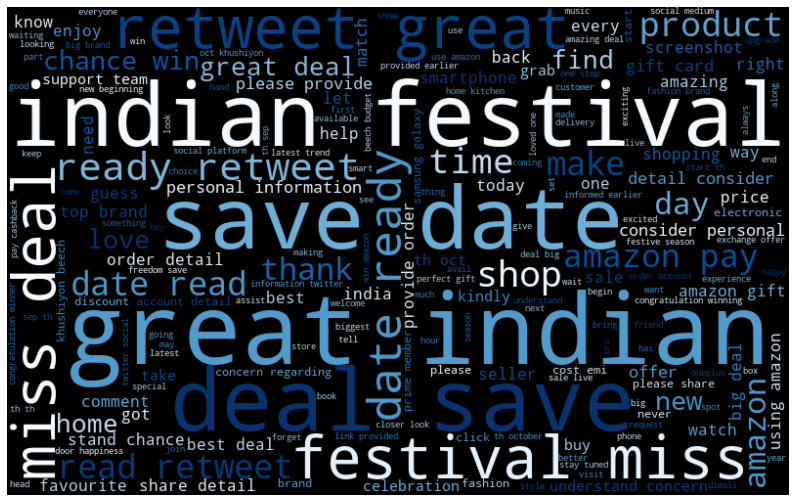

In [105]:
all_words = ' '.join([text for text in amazon_df['cleaned2'][amazon_df.sentiment == 'pos']])
generate_wordcloud(all_words)

### Positive word cloud suggests word such as **great indian sale**, **miss the date/deal**, **don't miss**, **amazing**.

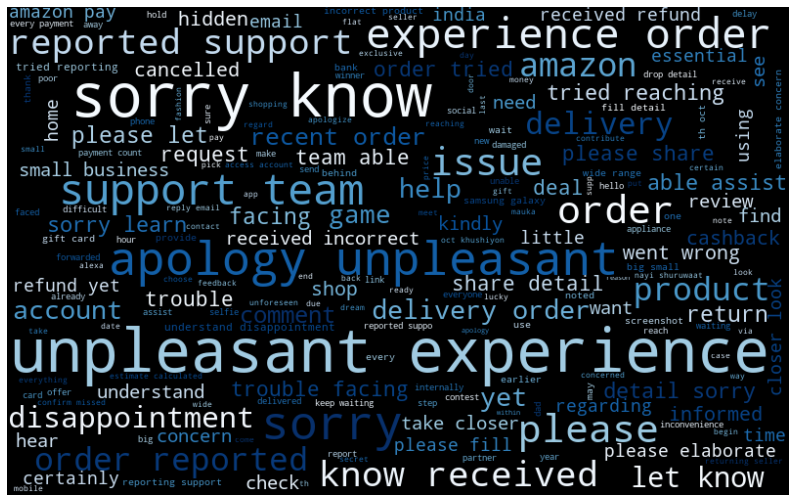

In [106]:
all_words = ' '.join([text for text in amazon_df['cleaned2'][amazon_df.sentiment == 'neg']])
generate_wordcloud(all_words)

## Negative word cloud suggests word such as **festival**,**retweet**, **concern**, **issue**, **disaapointment**.

#### There are many records which contains no phrases i.e where **amazon_df['key_phrases']** contains **[ ]**


In [107]:
amazon_df2 = amazon_df[amazon_df['key_phrases'].str.len()>0]

## **Feature extraction** 
### There are 2 main ways to extract features from given text and convert it into a matrix form.
### **1. Bag of words**
### **2. TF-IDF**

### Bag of words evaluation.

In [108]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(amazon_df2['cleaned2'])

### TF-IDF word evaluation.

In [109]:
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
#amazon
tfidf_word_feature_a = tfidf_word_vectorizer.fit_transform(amazon_df2['cleaned2'])


### Phrase evaluation using **Bag of words** and **TF-IDF**.

In [110]:
phrase_sents = amazon_df2['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

### Setting the target variable.

In [111]:
#amazon
target_variable_a = amazon_df2['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

### Function to plot confusion matrix

In [112]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

### Function to initialise **gaussain naive bayes** model.

In [113]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

### Function to define **random forest classifier** model.

In [114]:
from sklearn.ensemble import RandomForestClassifier
def rf_model(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = random_forest.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

### Evaluation using **Bag of words** for key words using **naive bayes** model.

Accuracy Score - 0.8897058823529411


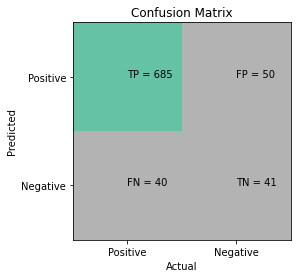

In [115]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable_a, test_size=0.3, random_state=2021)
naive_model(X_train, X_test, y_train, y_test)

### Evaluation using **TF-IDF** for key words using **naive bayes** model.

Accuracy Score - 0.8860294117647058


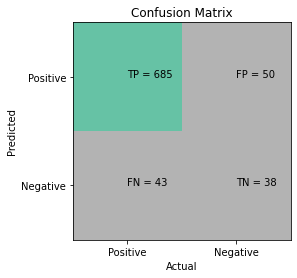

In [116]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature_a, target_variable_a, test_size=0.3, random_state=2021)
naive_model(X_train, X_test, y_train, y_test)

### Evaluation for **Bag of words** for key words using **Random forest** model.

Accuracy Score - 0.9546568627450981


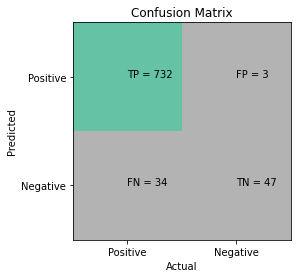

In [117]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable_a, test_size=0.3, random_state=2021)
rf_model(X_train, X_test, y_train, y_test)

### Evaluation using **TF-IDF** for key words using **Random forest** model.

Accuracy Score - 0.9558823529411765


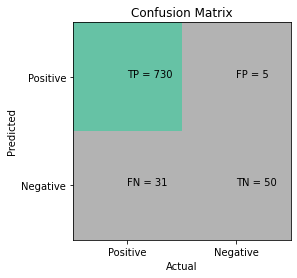

In [118]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature_a, target_variable_a, test_size=0.3, random_state=2021)
rf_model(X_train, X_test, y_train, y_test)

### Evaluation using **Bag of words** for key phrases using **naive bayes** model.

Accuracy Score - 0.7561274509803921


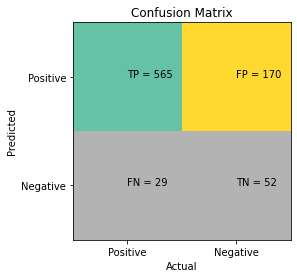

In [119]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable_a, test_size=0.3, random_state=2021)
naive_model(X_train, X_test, y_train, y_test)

### Evaluation using **Bag of Words** for key phrases using **Random forest** model.

Accuracy Score - 0.9264705882352942


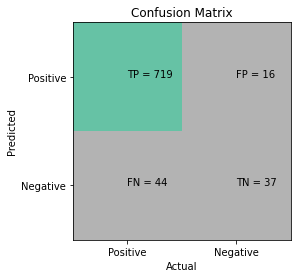

In [120]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable_a, test_size=0.3, random_state=2021)
rf_model(X_train, X_test, y_train, y_test)

### Evaluation using **TF-IDF** for key phrases using **naive bayes** model.

Accuracy Score - 0.7549019607843137


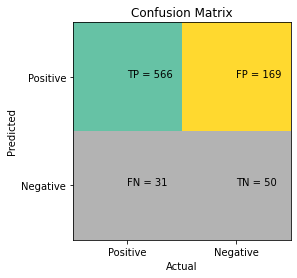

In [121]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature , target_variable_a, test_size=0.3, random_state=2021)
naive_model(X_train, X_test, y_train, y_test)

### Evaluation using **TF-IDF** for key phrases using **Random forest** model.

Accuracy Score - 0.9301470588235294


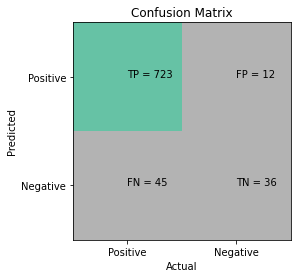

In [122]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature , target_variable_a, test_size=0.3, random_state=2021)
rf_model(X_train, X_test, y_train, y_test)

## **Accuracy summary**
### **Key words**
#### 1. Bag of words(naive bayes) ----- 89.58%
#### 2. TF-IDF(naive bayes) ----- 89.46%
#### 3. Bag of words(Random forest) ----- 95.95%
#### 4. TF-IDF(Random forest) ----- 95.95%

### **Key Phrases**
#### 1. Bag of words(naive bayes) ----- 74.14%
#### 2. TF-IDF(naive bayes) ----- 77.59%
#### 3. Bag of words(Random forest) ----- 92.27%
#### 4. TF-IDF(Random forest) ----- 93.38%

### Analysis and prediction using **key words** gave more accuracy as compared to **key phrases**.
### **Random forest model** performed very well as compared to **Gaussian Naive Bayes model**.

### **Thank You**

### This was all from my side. Do provide your valuable suggestions and feedback in the comments.